In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
import pickle

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def selectkbest(indep_X,dep_Y,n):
    test = SelectKBest(score_func=f_classif, k=n)
    fit1= test.fit(indep_X,dep_Y)
    selectk_features = fit1.transform(indep_X)
    return selectk_features

In [3]:
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test

In [4]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
    
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

In [5]:
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      

In [6]:
def svm_linear(X_train,y_train,X_test):

    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm


In [7]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [8]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm   

In [9]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm


In [10]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


In [11]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    

In [12]:
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [13]:
dataset1=pd.read_csv("advertising_campaign_performance.csv")

In [14]:
df2=dataset1

df2 = pd.get_dummies(df2, drop_first=True)
indep_X = df2.drop('Clicks', axis=1)
dep_Y = df2['Clicks']

In [15]:
# Convert Clicks into binary (Click / No Click)
df2['Clicks'] = df2['Clicks'].apply(lambda x: 1 if x > 0 else 0)


In [64]:
selector = SelectKBest(score_func=f_classif, k=7)
X_new = selector.fit_transform(indep_X, dep_Y)

C:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [66]:
selected_features = indep_X.columns[selector.get_support()]
print("Top features selected:", list(selected_features))

Top features selected: ['Campaign_ID_CAM0990', 'Campaign_ID_CAM0991', 'Campaign_ID_CAM0994', 'Campaign_ID_CAM0996', 'Campaign_ID_CAM0997', 'Campaign_ID_CAM0998', 'Campaign_ID_CAM1000']


C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_5704\3569590140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicks', data=df2, palette='viridis')


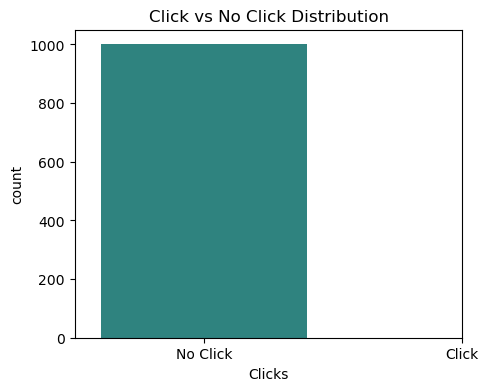

In [68]:
# 2. Univariate Analysis
plt.figure(figsize=(5,4))
sns.countplot(x='Clicks', data=df2, palette='viridis')
plt.title("Click vs No Click Distribution")
plt.xticks([0, 1], ['No Click', 'Click'])
plt.show()


In [69]:
kbest=selectkbest(indep_X,dep_Y,7)       

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

C:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [70]:
X_train, X_test, y_train, y_test=split_scalar(kbest,dep_Y)   


In [72]:
       
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

In [75]:
#7
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.0,0.0,0.0,0.0,0.0,0.0,0.0
